## Day 13

# Part 1

In [106]:
import numpy as np
import matplotlib.pyplot as plt

marks = []
folds = []

with open("paper.txt") as f:
    for line in f.readlines():
        stripped = line.strip()
        if line.startswith("fold along "):
            # fold
            fold = (stripped[11:].split("=")[0], int(stripped[11:].split("=")[1]))
            folds.append(fold)
        elif line.strip():
            # coordinates for a mark
            marks.append((int(stripped.split(",")[0]), int(stripped.split(",")[1])))
                          
# print(marks)
# print(folds)

In [107]:
max_x = max(mark[0] for mark in marks)
max_y = max(mark[1] for mark in marks)

paper = np.zeros([max_y + 1, max_x + 1])  # y, x

for mark in marks:
    paper[mark[1], mark[0]] += 1

# print(paper)

fold = folds[0]

if fold[0] == "y":
    # flip vertically, add to other half, crop
    flipped = np.flipud(paper[fold[1] + 1:, :])
    paper[(fold[1] - flipped.shape[0]):fold[1], :] += flipped
    paper = paper[:fold[1], :]
else:
    # flip horizontally, add to other half, crop
    flipped = np.fliplr(paper[:, fold[1] + 1:])
    paper[:, (fold[1] - flipped.shape[1]):fold[1]] += flipped
    paper = paper[:, :fold[1]]

# finally, clip to 1s and 0s
paper = np.clip(paper, 0, 1)

print(paper)
print("Number of marks:", int(np.sum(paper)))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Number of marks: 747


## Part 2

In [108]:
def fold_paper(paper, fold):
    "Takes in paper array and fold command tuple."
    
    if fold[0] == "y":
        # flip vertically, add to other half, crop
        flipped = np.flipud(paper[fold[1] + 1:, :])
        paper[(fold[1] - flipped.shape[0]):fold[1], :] += flipped
        paper = paper[:fold[1], :]
    else:
        # flip horizontally, add to other half, crop
        flipped = np.fliplr(paper[:, fold[1] + 1:])
        paper[:, (fold[1] - flipped.shape[1]):fold[1]] += flipped
        paper = paper[:, :fold[1]]
        
    # finally, clip to 1s and 0s
    return np.clip(paper, 0, 1)

In [109]:
max_x = max(mark[0] for mark in marks)
max_y = max(mark[1] for mark in marks)

paper = np.zeros([max_y + 1, max_x + 1])  # y, x

for mark in marks:
    paper[mark[1], mark[0]] += 1

for fold in folds:
    paper = fold_paper(paper, fold)
    
# print(paper)

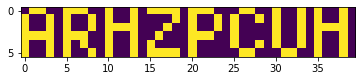

In [110]:
plt.imshow(paper)
plt.show()